In [124]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
import datetime

In [2]:
def percentile_ci(data, sigma_level):
    if sigma_level == 1:
        upper = 50 + (68.2689492137086/2)
        lower = 50 - (68.2689492137086/2)
    elif sigma_level == 2:
        upper = 50 + (95.45/2)
        lower = 50 - (95.45/2)
    elif sigma_level == 3:
        upper = 50 + (99.7300203936740/2)
        lower = 50 - (99.7300203936740/2)
    elif sigma_level == 5:
        upper = 50 + (99.9999426696856/2)
        lower = 50 - (99.9999426696856/2)
    else:
        return "Invalid sigma level"
    
    lower_bound = np.percentile(data, lower)
    upper_bound = np.percentile(data, upper)
    width = upper_bound - lower_bound

    return width, (lower_bound, upper_bound)

# OpenWeather Data (Ground Truth)

In [3]:
directory = './/data//api_data_IN'
 
dfs = []
c = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if os.path.isfile(f):
        dfs.append(pd.read_csv(f, index_col=0))
        c += 1
print(c)

54


In [4]:
ow_data = pd.concat(dfs).sort_values(["Date", "City"]) #Openweathermap
ow_data

,City,Lat,Lng,Date,CO,NO2,SO2,PM2_5
0,Agartala,23.834,91.288,2020-11-24,817.300000,10.467143,4.810000,76.442857
0,Agra,27.175,78.013,2020-11-24,1215.937143,25.215714,30.347143,297.268571
0,Aizwal,23.737,92.729,2020-11-24,240.802857,1.761429,1.218571,15.112857
0,Amritsar,31.568,74.939,2020-11-24,861.168571,21.971429,7.485714,46.547143
0,Asansol,23.680,86.959,2020-11-24,994.682857,12.228571,9.851429,206.548571
...,...,...,...,...,...,...,...,...
607,Srinagar,34.082,74.822,2022-07-25,1544.873750,37.338750,12.002083,64.362917
607,Thiruvananthapuram,8.474,76.874,2022-07-25,234.206667,3.235000,2.802083,6.545833
607,Varanasi,25.376,82.924,2022-07-25,718.474167,11.934583,7.788333,43.254167
607,Vijaywada,16.514,80.656,2022-07-25,601.232500,12.245000,8.918750,27.298750


In [5]:
city_list = np.unique(ow_data["City"])
city_list

array(['Agartala', 'Agra', 'Aizwal', 'Amritsar', 'Asansol', 'Aurangabad',
       'Bareilly', 'Belgaum', 'Bengaluru', 'Bhopal', 'Chandigarh',
       'Chennai', 'Coimbatore', 'Dehradun', 'Delhi', 'DurgBhilai',
       'Faridabad', 'Gandhinagar', 'Gangtok', 'Ghaziabad', 'Gorakhpur',
       'Gwalior', 'Hyderabad', 'Imphal', 'Indore', 'Jabalpur', 'Jaipur',
       'Jalandhar', 'Jodhpur', 'Kanpur', 'Kochi', 'Kohima', 'Kolkata',
       'Kota', 'Kozhikode', 'Lucknow', 'Ludhiana', 'Mangalore', 'Meerut',
       'Moradabad', 'Mumbai', 'Mysuru', 'Nashik', 'Patna', 'Prayagraj',
       'Puducherry', 'Pune', 'Shillong', 'Solapur', 'Srinagar',
       'Thiruvananthapuram', 'Varanasi', 'Vijaywada', 'Visakhapatnam'],
      dtype=object)

In [6]:
for col in ow_data.columns:
    na = ow_data[col].isna().sum()
    print(col, na/len(ow_data[col]))
    
    try:
        data = ow_data[col]
        ci = percentile_ci(data, 5)
        print(np.mean(data), np.median(data), ci)
    except:
        pass

City 0.0
Lat 0.0
22.713296296297916 24.3205 (25.608, (8.474, 34.082))
Lng 0.0
79.59396296295681 77.67099999999999 (21.418000000000006, (72.684, 94.102))
Date 0.0
CO 0.0
895.2096126505147 648.1012499999999 (12730.690237616716, (168.58181239996878, 12899.272050016685))
NO2 0.0
19.45484339604345 13.342291666666672 (226.01150349946806, (0.3797990034070269, 226.39130250287508))
SO2 0.0
16.591554474366248 9.667291666666667 (268.6305171454296, (0.15770782752555929, 268.78822497295516))
PM2_5 0.0
85.25408647504787 56.57458333333333 (1134.8031642721944, (0.5084784204738182, 1135.3116426926683))


In [7]:
data = ow_data["CO"]
_, gt_CO_ci = percentile_ci(data, 5)

data = ow_data["NO2"]
_, gt_NO2_ci = percentile_ci(data, 5)

data = ow_data["SO2"]
_, gt_SO2_ci = percentile_ci(data, 5)

data = ow_data["PM2_5"]
_, gt_PM2_5_ci = percentile_ci(data, 5)

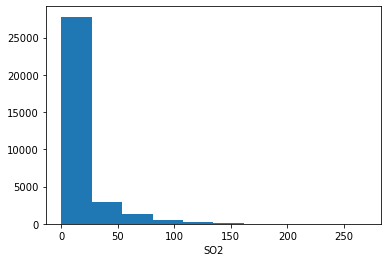

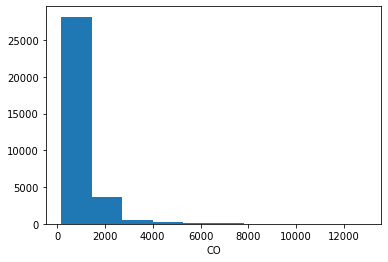

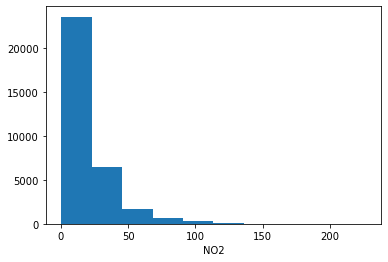

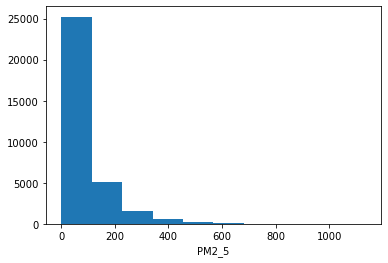

In [8]:
plt.hist(ow_data["SO2"])
plt.xlabel("SO2")
plt.show()

plt.hist(ow_data["CO"])
plt.xlabel("CO")
plt.show()

plt.hist(ow_data["NO2"])
plt.xlabel("NO2")
plt.show()

plt.hist(ow_data["PM2_5"])
plt.xlabel("PM2_5")
plt.show()

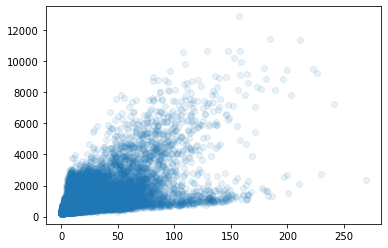

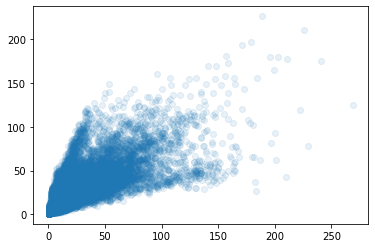

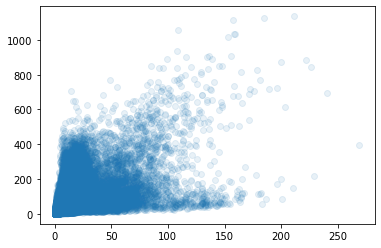

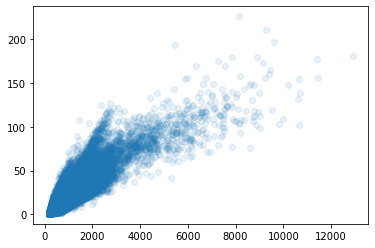

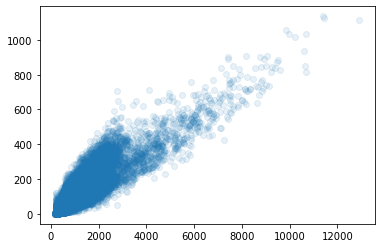

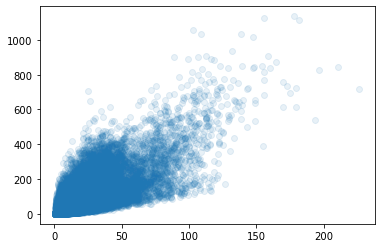

In [106]:
plt.scatter(ow_data["SO2"], ow_data["CO"], alpha=0.1)
plt.show()

plt.scatter(ow_data["SO2"], ow_data["NO2"], alpha=0.1)
plt.show()

plt.scatter(ow_data["SO2"], ow_data["PM2_5"], alpha=0.1)
plt.show()

plt.scatter(ow_data["CO"], ow_data["NO2"], alpha=0.1)
plt.show()

plt.scatter(ow_data["CO"], ow_data["PM2_5"], alpha=0.1)
plt.show()

plt.scatter(ow_data["NO2"], ow_data["PM2_5"], alpha=0.1)
plt.show()

# Government Data

In [50]:
directory = './/data//official_air_pollution_IN' # government data

dfs_by_city = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
#     print(f, "###")
    
    first = True
    for filename2 in os.listdir(f):
        f2 = os.path.join(filename, filename2)
        path = '.\\data\\official_air_pollution_IN\\'+f2
        
        if first:
            df = pd.read_excel(path, skiprows=16)
            first = False
        else:
            df2 = pd.read_excel(path, skiprows=16)
            df = df2.merge(df, how="inner")
            
    dfs_by_city.append(df)

In [51]:
for i in range(len(dfs_by_city)):
    dfs_by_city[i]["City"] = city_list[i]

In [52]:
all_gov_data = pd.concat(dfs_by_city).sort_values(["From Date", "City"])
all_gov_data = all_gov_data.rename(columns={"PM2.5":"PM2_5","From Date":"Date"}).drop(["NH3", "To Date"], axis=1)
# all_gov_data["Date"] = pd.to_datetime(all_gov_data.Date)
all_gov_data = all_gov_data.replace("None", np.nan)
all_gov_data["CO"] = all_gov_data["CO"]*1000 # reported in mg/m3, need to convert to ug/m3
all_gov_data

,Date,SO2,CO,NO2,City,PM2_5
0,01-01-2018 00:00,NaN,NaN,NaN,Agartala,NaN
0,01-01-2018 00:00,NaN,NaN,NaN,Aizwal,NaN
0,01-01-2018 00:00,2.78,NaN,30.43,Amritsar,NaN
0,01-01-2018 00:00,NaN,NaN,NaN,Asansol,NaN
0,01-01-2018 00:00,NaN,NaN,NaN,Bareilly,NaN
...,...,...,...,...,...,...
1460,31-12-2021 00:00,8.01,NaN,15.06,Puducherry,13.05
1460,31-12-2021 00:00,18.98,1360.0,38.88,Solapur,36.53
1460,31-12-2021 00:00,12.78,570.0,4.92,Srinagar,35.98
1460,31-12-2021 00:00,NaN,NaN,NaN,Vijaywada,NaN


In [53]:
for col in all_gov_data.columns:
    na = all_gov_data[col].isna().sum()
    print(col, na/len(all_gov_data[col]))
    
    try:
        data = all_gov_data[col].dropna()
        ci = percentile_ci(data, 5)
        print(np.mean(data), np.median(data), ci)
    except:
        pass

Date 0.0
SO2 0.5428160818815941
10.822096910220054 9.27 (186.9382779867995, (0.01, 186.9482779867995))
CO 0.8848890602544779
694.6574299634592 620.0 (4820.0, (0.0, 4820.0))
NO2 0.5419748326264503
23.41623823371857 19.14 (247.40344131027103, (0.01, 247.41344131027103))
City 0.0
PM2_5 0.5848434925864909
42.96899822695036 35.23 (998.2488094549985, (0.10291966378822605, 998.3517291187868))


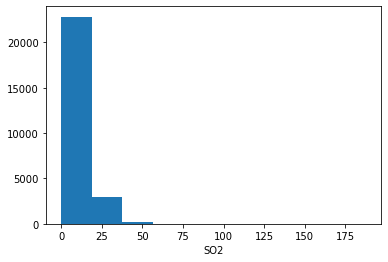

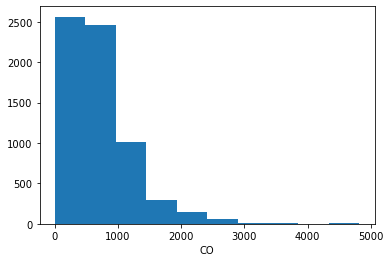

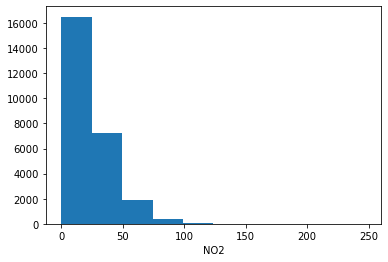

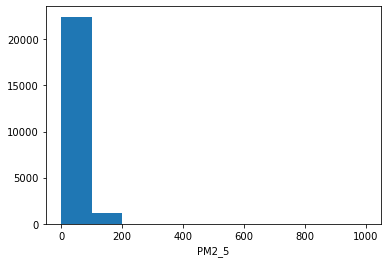

In [54]:
plt.hist(all_gov_data["SO2"])
plt.xlabel("SO2")
plt.show()

plt.hist(all_gov_data["CO"])
plt.xlabel("CO")
plt.show()

plt.hist(all_gov_data["NO2"])
plt.xlabel("NO2")
plt.show()

plt.hist(all_gov_data["PM2_5"])
plt.xlabel("PM2_5")
plt.show()

(4650.0, (170.0, 4820.0)) (160.0, (0.0, 160.0))


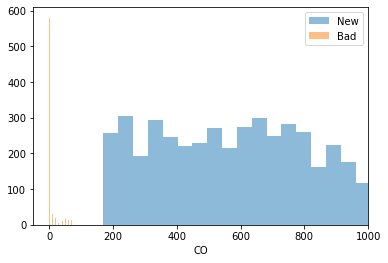

(205.0760024620109, (0.38, 205.4560024620109)) (247.47890726700825, (0.01, 247.48890726700824))


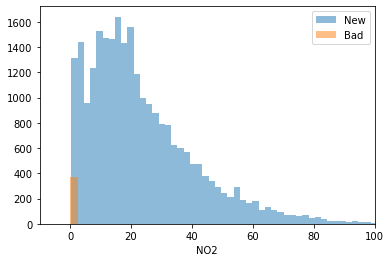

(186.7889275848762, (0.16, 186.9489275848762)) (0.13, (0.01, 0.14))


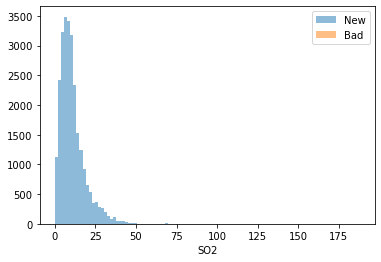

(997.81996508205, (0.5318331998664501, 998.3517982819164)) (0.0, (0.1, 0.1))


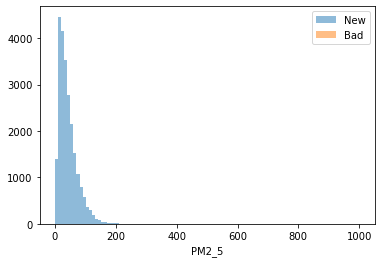

In [55]:
new_gov_CO = []
bad_gov_CO = []
for i in range(len(all_gov_data["CO"])):
    if not (gt_CO_ci[0]<all_gov_data["CO"].iloc[i]<gt_CO_ci[1]):
        new_gov_CO.append(np.nan)
        bad_gov_CO.append(all_gov_data["CO"].iloc[i])
    else:
        new_gov_CO.append(all_gov_data["CO"].iloc[i])

new_gov_CO2 = [i for i in new_gov_CO if not np.isnan(i)]    
bad_gov_CO2 = [i for i in bad_gov_CO if not np.isnan(i)]
print(percentile_ci(new_gov_CO2, 5), percentile_ci(bad_gov_CO2, 5))
plt.hist(new_gov_CO2, label="New", alpha=0.5, bins=100)
plt.hist(bad_gov_CO2, label="Bad", alpha=0.5, bins=100)
plt.xlabel("CO")
plt.legend()
plt.xlim(-50,1000)
# plt.ylim(0,0.05)
plt.show()

new_gov_NO2 = []
bad_gov_NO2 = []
for i in range(len(all_gov_data["NO2"])):
    if not (gt_NO2_ci[0]<all_gov_data["NO2"].iloc[i]<gt_NO2_ci[1]):
        new_gov_NO2.append(np.nan)
        bad_gov_NO2.append(all_gov_data["NO2"].iloc[i])
    else:
        new_gov_NO2.append(all_gov_data["NO2"].iloc[i])

new_gov_NO22 = [i for i in new_gov_NO2 if not np.isnan(i)]    
bad_gov_NO22 = [i for i in bad_gov_NO2 if not np.isnan(i)]
print(percentile_ci(new_gov_NO22, 5), percentile_ci(bad_gov_NO22, 5))
plt.hist(new_gov_NO22, label="New", alpha=0.5, bins=100)
plt.hist(bad_gov_NO22, label="Bad", alpha=0.5, bins=100)
plt.xlabel("NO2")
plt.legend()
plt.xlim(-10,100)
plt.show()

new_gov_SO2 = []
bad_gov_SO2 = []
for i in range(len(all_gov_data["SO2"])):
    if not (gt_SO2_ci[0]<all_gov_data["SO2"].iloc[i]<gt_SO2_ci[1]):
        new_gov_SO2.append(np.nan)
        bad_gov_SO2.append(all_gov_data["SO2"].iloc[i])
    else:
        new_gov_SO2.append(all_gov_data["SO2"].iloc[i])

new_gov_SO22 = [i for i in new_gov_SO2 if not np.isnan(i)]    
bad_gov_SO22 = [i for i in bad_gov_SO2 if not np.isnan(i)]
print(percentile_ci(new_gov_SO22, 5), percentile_ci(bad_gov_SO22, 5))
plt.hist(new_gov_SO22, label="New", alpha=0.5, bins=100)
plt.hist(bad_gov_SO22, label="Bad", alpha=0.5, bins=100)
plt.xlabel("SO2")
plt.legend()
# plt.xlim(-50,1000)
plt.show()

new_gov_PM2_5 = []
bad_gov_PM2_5 = []
for i in range(len(all_gov_data["PM2_5"])):
    if not (gt_PM2_5_ci[0]<all_gov_data["PM2_5"].iloc[i]<gt_PM2_5_ci[1]):
        new_gov_PM2_5.append(np.nan)
        bad_gov_PM2_5.append(all_gov_data["PM2_5"].iloc[i])
    else:
        new_gov_PM2_5.append(all_gov_data["PM2_5"].iloc[i])

new_gov_PM2_52 = [i for i in new_gov_PM2_5 if not np.isnan(i)]    
bad_gov_PM2_52 = [i for i in bad_gov_PM2_5 if not np.isnan(i)]
print(percentile_ci(new_gov_PM2_52, 5), percentile_ci(bad_gov_PM2_52, 5))
plt.hist(new_gov_PM2_52, label="New", alpha=0.5, bins=100)
plt.hist(bad_gov_PM2_52, label="Bad", alpha=0.5, bins=100)
plt.xlabel("PM2_5")
plt.legend()
# plt.xlim(-50,1000)
plt.show()

In [56]:
all_gov_data["CO"] = new_gov_CO

# Satellite Data

In [16]:
satellite_BC = pd.read_csv('.//data//satellite_data//satellite_data_blackCarbon_India.csv', index_col=0)
# display(satellite_BC.head())

satellite_CO = pd.read_csv('.//data//satellite_data//satellite_data_CO_India.csv', index_col=0)
# display(satellite_CO.head())

satellite_NO2 = pd.read_csv('.//data//satellite_data//satellite_data_NO2_India.csv', index_col=0)
# display(satellite_NO2.head())

satellite_SO2 = pd.read_csv('.//data//satellite_data//satellite_data_SO2_India.csv', index_col=0)
# display(satellite_SO2.head())

In [17]:
satellite_BC = satellite_BC.rename(columns={"NewDelhi": "Delhi", "Mangaluru":"Mangalore", "Pondicherry":"Puducherry"})
satellite_BC = satellite_BC.melt(id_vars="date", var_name="City", value_name="PM2_5")

satellite_CO = satellite_CO.rename(columns={"NewDelhi": "Delhi", "Mangaluru":"Mangalore", "Pondicherry":"Puducherry"})
satellite_CO = satellite_CO.melt(id_vars="date", var_name="City", value_name="CO")

satellite_NO2 = satellite_NO2.rename(columns={"NewDelhi": "Delhi", "Mangaluru":"Mangalore", "Pondicherry":"Puducherry"})
satellite_NO2 = satellite_NO2.melt(id_vars="date", var_name="City", value_name="NO2")

satellite_SO2 = satellite_SO2.rename(columns={"NewDelhi": "Delhi", "Mangaluru":"Mangalore", "Pondicherry":"Puducherry"})
satellite_SO2 = satellite_SO2.melt(id_vars="date", var_name="City", value_name="SO2")

In [18]:
df1 = satellite_BC.merge(satellite_CO, on=["date", "City"], how="outer")
df2 = df1.merge(satellite_NO2, on=["date", "City"], how="outer")
all_satellite_data = df2.merge(satellite_SO2, on=["date", "City"], how="outer").rename(columns={"date": "Date"})
all_satellite_data["Date"] = pd.to_datetime(all_satellite_data.Date)
all_satellite_data

,Date,City,PM2_5,CO,NO2,SO2
0,1980-01-01,Agartala,1.250000e-09,NaN,NaN,NaN
1,1980-02-01,Agartala,9.960000e-10,NaN,NaN,NaN
2,1980-03-01,Agartala,8.730000e-10,NaN,NaN,NaN
3,1980-04-01,Agartala,5.740000e-10,NaN,NaN,NaN
4,1980-05-01,Agartala,4.130000e-10,NaN,NaN,NaN
...,...,...,...,...,...,...
413642,2022-04-05,Visakhapatnam,NaN,NaN,-1.270000e+30,-1.916727e-01
413643,2022-04-06,Visakhapatnam,NaN,NaN,-1.270000e+30,1.791918e-01
413644,2022-04-14,Visakhapatnam,NaN,NaN,-1.270000e+30,2.521787e-01
413645,2022-08-01,Visakhapatnam,NaN,NaN,-1.270000e+30,-1.270000e+30


In [19]:
for col in all_satellite_data.columns:
    na = all_satellite_data[col].isna().sum()
    print(col, na/len(all_satellite_data[col]))
    
    try:
        data = all_satellite_data[col].dropna()
        ci = percentile_ci(data, 5)
        print(np.mean(data), np.median(data), ci)
    except:
        pass

Date 0.0
City 0.0
PM2_5 0.9342168564017145
1.3545991657785388e-09 9.63e-10 (1.1923600521599138e-08, (7.561949947318705e-11, 1.1999220021072325e-08))
CO 0.06454053818835867
-7766.713552955729 -9999.0 (10258.789755814494, (-9999.0, 259.78975581449487))
NO2 0.15223366783755232
-5.267872908327538e+29 3151905000000000.0 (1.2700000000000455e+30, (-1.27e+30, 4.566984353798907e+16))
SO2 0.15371802527275671
-7.089117927661457e+29 -1.27e+30 (1.27e+30, (-1.27e+30, 85.45435514914642))


0.15770782752555929 268.78822497295516
-7.089117927661457e+29


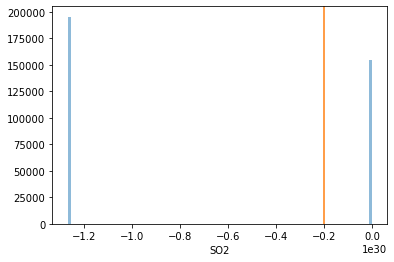

168.58181239996878 12899.272050016685
-7766.713552955729


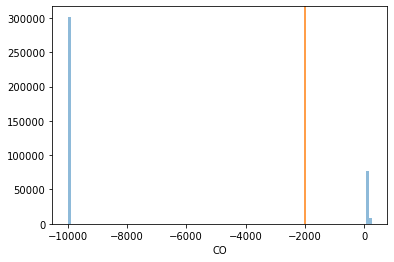

0.3797990034070269 226.39130250287508
-5.267872908327538e+29


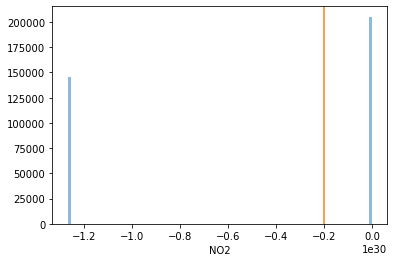

0.5084784204738182 1135.3116426926683
1.3545991657785388e-09


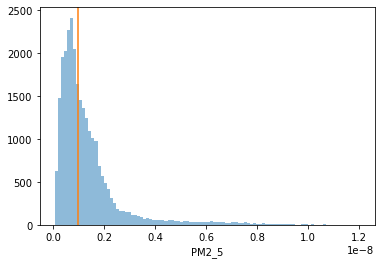

In [20]:
plt.hist(all_satellite_data["SO2"], alpha=0.5, bins=100)
print(gt_SO2_ci[0], gt_SO2_ci[1])
print(np.mean(all_satellite_data["SO2"].dropna()))
plt.axvline(-0.2e30, color="tab:orange")
# plt.axvline(gt_SO2_ci[0], color="tab:orange")
# plt.axvline(gt_SO2_ci[1], color="tab:orange")
plt.xlabel("SO2")
plt.show()

plt.hist(all_satellite_data["CO"], alpha=0.5, bins=100)
print(gt_CO_ci[0], gt_CO_ci[1])
print(np.mean(all_satellite_data["CO"].dropna()))
plt.axvline(-2000, color="tab:orange")
# plt.axvline(gt_CO_ci[0], color="tab:orange")
# plt.axvline(gt_CO_ci[1], color="tab:orange")
plt.xlabel("CO")
plt.show()

plt.hist(all_satellite_data["NO2"], alpha=0.5, bins=100)
print(gt_NO2_ci[0], gt_NO2_ci[1])
print(np.mean(all_satellite_data["NO2"].dropna()))
plt.axvline(-0.2e30, color="tab:orange")
# plt.axvline(gt_NO2_ci[0], color="tab:orange")
# plt.axvline(gt_NO2_ci[1], color="tab:orange")
plt.xlabel("NO2")
plt.show()

plt.hist(all_satellite_data["PM2_5"], alpha=0.5, bins=100)
print(gt_PM2_5_ci[0], gt_PM2_5_ci[1])
print(np.mean(all_satellite_data["PM2_5"].dropna()))
plt.axvline(np.median(all_satellite_data["PM2_5"].dropna()), color="tab:orange")
# plt.axvline(gt_PM2_5_ci[0], color="tab:orange")
# plt.axvline(gt_PM2_5_ci[1], color="tab:orange")
plt.xlabel("PM2_5")
plt.show()

In [21]:
new_satellite_SO2 = []
count = 0
for i in range(len(all_satellite_data["SO2"])):
#     if not (gt_SO2_ci[0]<all_satellite_data["SO2"].iloc[i]<gt_SO2_ci[1]):
    if all_satellite_data["SO2"].iloc[i] < -0.2e30:
        new_satellite_SO2.append(np.nan)
        count += 1
    else:
        new_satellite_SO2.append(all_satellite_data["SO2"].iloc[i])
print(count/len(all_satellite_data["SO2"]), len(new_satellite_SO2)-count)

new_satellite_CO = []
count = 0
for i in range(len(all_satellite_data["CO"])):
#     if not (gt_CO_ci[0]<all_satellite_data["CO"].iloc[i]<gt_CO_ci[1]):
    if all_satellite_data["CO"].iloc[i] < -2000:
        new_satellite_CO.append(np.nan)
        count += 1
    else:
        new_satellite_CO.append(all_satellite_data["CO"].iloc[i])
print(count/len(all_satellite_data["CO"]), len(all_satellite_data["CO"])-count)

new_satellite_NO2 = []
count = 0
for i in range(len(all_satellite_data["NO2"])):
#     if not (gt_NO2_ci[0]<all_satellite_data["NO2"].iloc[i]<gt_NO2_ci[1]):
    if all_satellite_data["NO2"].iloc[i] < -0.2e30:
        new_satellite_NO2.append(np.nan)
        count += 1
    else:
        new_satellite_NO2.append(all_satellite_data["NO2"].iloc[i])
print(count/len(all_satellite_data["NO2"]), len(all_satellite_data["NO2"])-count)

new_satellite_PM2_5 = []
count = 0
for i in range(len(all_satellite_data["PM2_5"])):
    if not (gt_PM2_5_ci[0]<all_satellite_data["PM2_5"].iloc[i]<gt_PM2_5_ci[1]):
        new_satellite_PM2_5.append(np.nan)
        count += 1
    else:
        new_satellite_PM2_5.append(all_satellite_data["PM2_5"].iloc[i])
print(count/len(all_satellite_data["PM2_5"]), len(all_satellite_data["PM2_5"])-count)

0.47239312747342543 218243
0.7292739944928889 111985
0.3516476609282794 268189
1.0 0


In [22]:
all_satellite_data2 = all_satellite_data.copy()
all_satellite_data2["SO2"] = new_satellite_SO2
all_satellite_data2["NO2"] = new_satellite_NO2
all_satellite_data2["CO"] = new_satellite_CO
# all_satellite_data2["PM2_5"] = new_satellite_PM2_5

0.15770782752555929 268.78822497295516


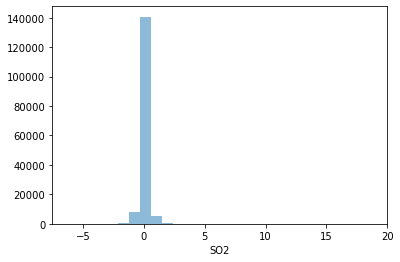

168.58181239996878 12899.272050016685


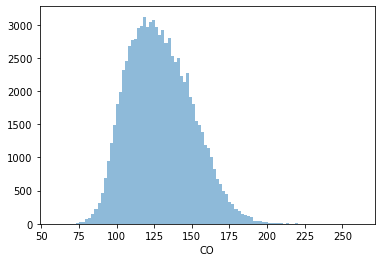

0.3797990034070269 226.39130250287508


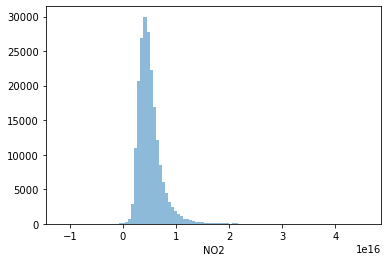

0.5084784204738182 1135.3116426926683


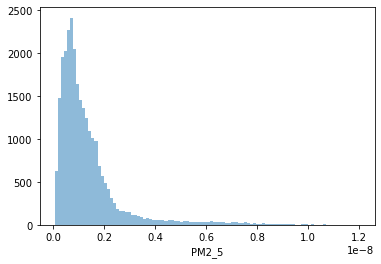

In [23]:
plt.hist(all_satellite_data2["SO2"], alpha=0.5, bins=100)
print(gt_SO2_ci[0], gt_SO2_ci[1])
plt.xlim(right=20)
# plt.axvline(gt_SO2_ci[0], color="tab:orange")
# plt.axvline(gt_SO2_ci[1], color="tab:orange")
plt.xlabel("SO2")
plt.show()

plt.hist(all_satellite_data2["CO"], alpha=0.5, bins=100)
print(gt_CO_ci[0], gt_CO_ci[1])
# plt.axvline(gt_CO_ci[0], color="tab:orange")
# plt.axvline(gt_CO_ci[1], color="tab:orange")
plt.xlabel("CO")
plt.show()

plt.hist(all_satellite_data2["NO2"], alpha=0.5, bins=100)
print(gt_NO2_ci[0], gt_NO2_ci[1])
# plt.axvline(gt_NO2_ci[0], color="tab:orange")
# plt.axvline(gt_NO2_ci[1], color="tab:orange")
plt.xlabel("NO2")
plt.show()

plt.hist(all_satellite_data2["PM2_5"], alpha=0.5, bins=100)
print(gt_PM2_5_ci[0], gt_PM2_5_ci[1])
# plt.axvline(gt_PM2_5_ci[0], color="tab:orange")
# plt.axvline(gt_PM2_5_ci[1], color="tab:orange")
plt.xlabel("PM2_5")
plt.show()

# Traffic

In [24]:
traffic = pd.read_csv('.//data//2020_IN_Region_Mobility_Report.csv')
traffic["Date"] = pd.to_datetime(traffic.date)
traffic = traffic.sort_values(by="Date")


for col in traffic.columns:
    na = traffic[col].isna().sum()
    print(col, na/len(traffic[col]))
    
    try:
        data = traffic[col].dropna()
        ci = percentile_ci(data, 5)
        print(np.mean(data), np.median(data), ci)
    except:
        pass

country_region_code 0.0
country_region 0.0
sub_region_1 0.0015080688731765755
sub_region_2 0.05566700335909422
metro_area 1.0
iso_3166_2_code 0.9458410655140823
census_fips_code 1.0
place_id 0.003016137746353151
date 0.0
retail_and_recreation_percent_change_from_baseline 0.07927932160390877
-37.270139810184716 -38.0 (409.49440080401837, (-97.0, 312.49440080401837))
grocery_and_pharmacy_percent_change_from_baseline 0.14140612153813628
5.197153581824947 4.0 (702.3899432928301, (-92.0, 610.3899432928301))
parks_percent_change_from_baseline 0.06084423668694651
-25.76295121658396 -28.0 (529.1404623619746, (-100.0, 429.14046236197464))
transit_stations_percent_change_from_baseline 0.05252871673204764
-26.522313238196297 -27.0 (617.9594221154111, (-95.0, 522.9594221154111))
workplaces_percent_change_from_baseline 0.008151088769350027
-16.431531830238725 -14.0 (349.81844722030803, (-89.9394824067655, 259.87896481354255))
residential_percent_change_from_baseline 0.05897441920556247
12.289892262

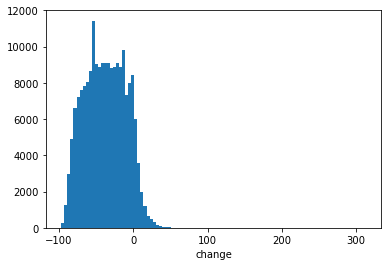

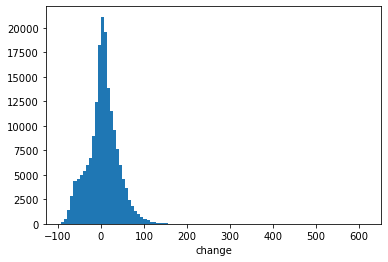

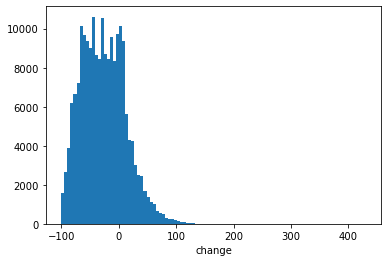

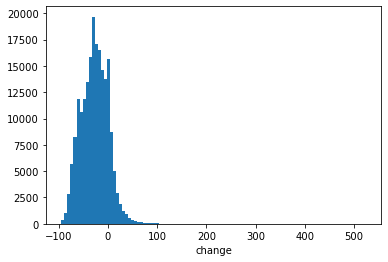

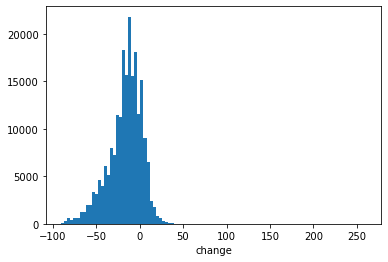

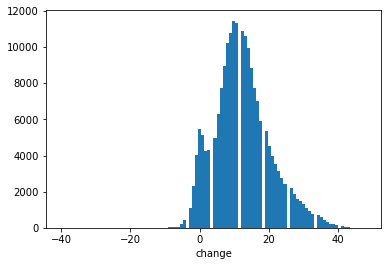

In [25]:
plt.hist(traffic["retail_and_recreation_percent_change_from_baseline"], bins=100)
plt.xlabel("change")
plt.show()

plt.hist(traffic["grocery_and_pharmacy_percent_change_from_baseline"], bins=100)
plt.xlabel("change")
plt.show()

plt.hist(traffic["parks_percent_change_from_baseline"], bins=100)
plt.xlabel("change")
plt.show()

plt.hist(traffic["transit_stations_percent_change_from_baseline"], bins=100)
plt.xlabel("change")
plt.show()

plt.hist(traffic["workplaces_percent_change_from_baseline"], bins=100)
plt.xlabel("change")
plt.show()

plt.hist(traffic["residential_percent_change_from_baseline"], bins=100)
plt.xlabel("change")
plt.show()

2020-02-15 00:00:00
2020-12-31 00:00:00


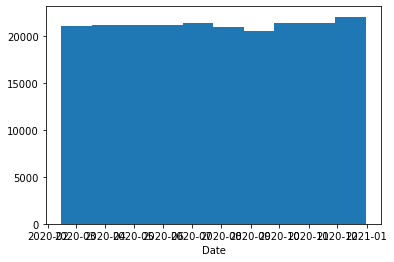

In [26]:
print(min(traffic["Date"]))
print(max(traffic["Date"]))

plt.hist(traffic["Date"])
plt.xlabel("Date")
plt.show()

In [135]:
min(traffic["Date"])

Timestamp('2020-02-15 00:00:00')

In [136]:
max(traffic["Date"])

Timestamp('2020-12-31 00:00:00')

# Combination

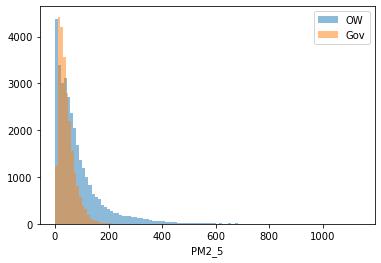

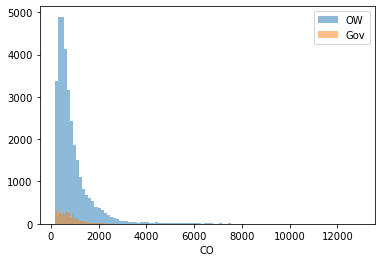

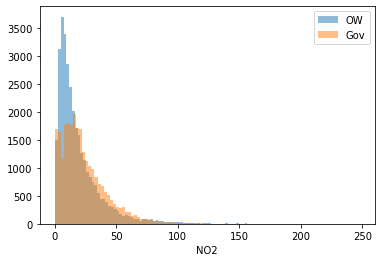

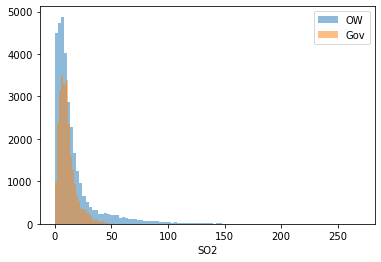

In [57]:
plt.hist(ow_data["PM2_5"], label="OW", alpha=0.5, bins=100)
plt.hist(all_gov_data["PM2_5"], label="Gov", alpha=0.5, bins=100)
# plt.hist(all_satellite_data["PM2_5"], label="Sat", alpha=0.5, bins=100)
plt.xlabel("PM2_5")
plt.legend()
plt.show()


plt.hist(ow_data["CO"], label="OW", alpha=0.5, bins=100)
plt.hist(all_gov_data["CO"], label="Gov", alpha=0.5, bins=100)
# plt.hist(all_satellite_data["CO"], label="Sat", alpha=0.5, bins=100)
plt.xlabel("CO")
plt.legend()
plt.show()


plt.hist(ow_data["NO2"], label="OW", alpha=0.5, bins=100)
plt.hist(all_gov_data["NO2"], label="Gov", alpha=0.5, bins=100)
# plt.hist(all_satellite_data["NO2"], label="Sat", alpha=0.5, bins=100)
plt.xlabel("NO2")
plt.legend()
plt.show()


plt.hist(ow_data["SO2"], label="OW", alpha=0.5, bins=100)
plt.hist(all_gov_data["SO2"], label="Gov", alpha=0.5, bins=100)
# plt.hist(all_satellite_data["SO2"], label="Sat", alpha=0.5, bins=100)
plt.xlabel("SO2")
plt.legend()
plt.show()

In [33]:
all_gov_data.columns

Index(['Date', 'SO2', 'CO', 'NO2', 'City', 'PM2_5'], dtype='object')

In [34]:
ow_data.columns

Index(['City', 'Lat', 'Lng', 'Date', 'CO', 'NO2', 'SO2', 'PM2_5'], dtype='object')

In [38]:
print(min(ow_data.Date), max(ow_data.Date))
print(min(all_gov_data.Date), max(all_gov_data.Date))

print(len(ow_data))
print(len(all_gov_data), len(all_gov_data)/sum(all_gov_data.isna().sum()))

2020-11-24 2022-07-25
2018-01-01 00:00:00 2022-12-08 00:00:00
32832
57058 0.38915033214660827


In [88]:
ow_data = ow_data.reset_index(drop=True)
all_gov_data = all_gov_data.reset_index(drop=True)

In [93]:
ow_data["Date"] = pd.to_datetime(ow_data.Date).dt.date
all_gov_data["Date"] = pd.to_datetime(all_gov_data.Date).dt.date

In [ ]:
all_gov_data_date = all_gov_data.groupby("Date").mean().reset_index()
ow_data_date = ow_data.groupby("Date").mean().reset_index()
all_dates = pd.concat([ow_data_date["Date"],all_gov_data_date["Date"]]).unique()
print(min(all_dates),max(all_dates))
print(min(ow_data_date.Date), max(ow_data_date.Date))
print(min(all_gov_data_date.Date), max(all_gov_data_date.Date))

In [108]:
all_gov_data_date[["SO2","NO2","CO","PM2_5"]].corr()

,SO2,NO2,CO,PM2_5
SO2,1.000000,0.251047,0.108651,0.186639
NO2,0.251047,1.000000,0.483361,0.764045
CO,0.108651,0.483361,1.000000,0.382254
PM2_5,0.186639,0.764045,0.382254,1.000000


In [109]:
ow_data_date[["SO2","NO2","CO","PM2_5"]].corr()

,SO2,NO2,CO,PM2_5
SO2,1.000000,0.672702,0.612066,0.546844
NO2,0.672702,1.000000,0.975756,0.931256
CO,0.612066,0.975756,1.000000,0.956175
PM2_5,0.546844,0.931256,0.956175,1.000000


2018-01-01 2022-12-08
2020-11-24 2022-07-25
2018-01-01 2022-12-08


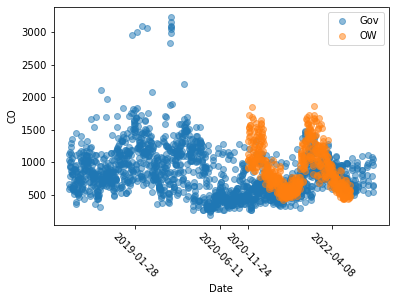

In [98]:
plt.plot_date(all_gov_data_date["Date"], all_gov_data_date["CO"], label="Gov", alpha=0.5)
plt.plot_date(ow_data_date["Date"], ow_data_date["CO"], label="OW", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("CO")
plt.legend()
ax = plt.gca()
ax.axes.get_xaxis().set_ticks(all_dates[::500])
plt.xticks(rotation=-45)
plt.show()

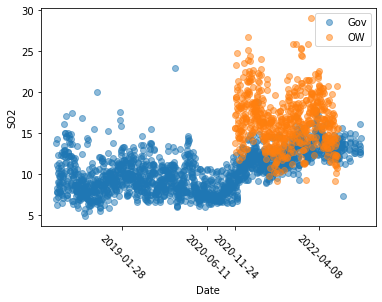

In [99]:
plt.plot_date(all_gov_data_date["Date"], all_gov_data_date["SO2"], label="Gov", alpha=0.5)
plt.plot_date(ow_data_date["Date"], ow_data_date["SO2"], label="OW", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("SO2")
plt.legend()
ax = plt.gca()
ax.axes.get_xaxis().set_ticks(all_dates[::500])
plt.xticks(rotation=-45)
plt.show()

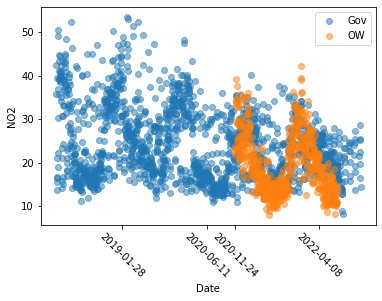

In [100]:
plt.plot_date(all_gov_data_date["Date"], all_gov_data_date["NO2"], label="Gov", alpha=0.5)
plt.plot_date(ow_data_date["Date"], ow_data_date["NO2"], label="OW", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("NO2")
plt.legend()
ax = plt.gca()
ax.axes.get_xaxis().set_ticks(all_dates[::500])
plt.xticks(rotation=-45)
plt.show()

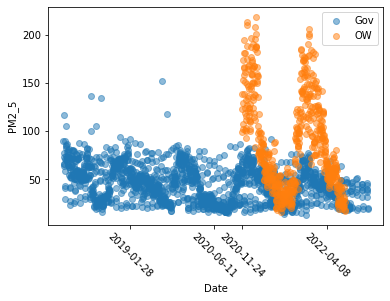

In [101]:
plt.plot_date(all_gov_data_date["Date"], all_gov_data_date["PM2_5"], label="Gov", alpha=0.5)
plt.plot_date(ow_data_date["Date"], ow_data_date["PM2_5"], label="OW", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("PM2_5")
plt.legend()
ax = plt.gca()
ax.axes.get_xaxis().set_ticks(all_dates[::500])
plt.xticks(rotation=-45)
plt.show()

In [363]:
all_gov_data_date_pre = all_gov_data_date[(all_gov_data_date['Date'] < datetime.date(2020, 1, 1))]
all_gov_data_date_2020 = all_gov_data_date[(all_gov_data_date['Date'] >= datetime.date(2020, 1, 1)) & (all_gov_data_date['Date'] <= datetime.date(2021, 12, 31))]
all_gov_data_date_2022 = all_gov_data_date[(all_gov_data_date['Date'] >= datetime.date(2022, 1, 1))]
ow_data_date_2020 = ow_data_date[(ow_data_date['Date'] >= datetime.date(2020, 1, 1)) & (ow_data_date['Date'] <= datetime.date(2021, 12, 31))]
ow_data_date_2022 = ow_data_date[(ow_data_date['Date'] >= datetime.date(2022, 1, 1))]

In [364]:
all_gov_data_date_pre = all_gov_data_date_pre.set_index("Date")
all_gov_data_date_2020 = all_gov_data_date_2020.set_index("Date")
all_gov_data_date_2022 = all_gov_data_date_2022.set_index("Date")
ow_data_date_2020 = ow_data_date_2020.set_index("Date").drop(["Lat","Lng"], axis=1)
ow_data_date_2022 = ow_data_date_2022.set_index("Date").drop(["Lat","Lng"], axis=1)

In [370]:
SO2_df_pre = all_gov_data_date_pre["SO2"].to_frame()
SO2_mean_data_pre = SO2_df_pre.mean(axis=1, skipna=True)
SO2_df_2020 = all_gov_data_date_2020["SO2"].to_frame().join(ow_data_date_2020["SO2"].to_frame(), lsuffix="_gov", rsuffix="_ow", how="outer")
SO2_mean_data_2020 = SO2_df_2020.mean(axis=1, skipna=True)
SO2_df_2022 = all_gov_data_date_2022["SO2"].to_frame().join(ow_data_date_2022["SO2"].to_frame(), lsuffix="_gov", rsuffix="_ow", how="outer")
SO2_mean_data_2022 = SO2_df_2022.mean(axis=1, skipna=True)

NO2_df_pre = all_gov_data_date_pre["NO2"].to_frame()
NO2_mean_data_pre = NO2_df_pre.mean(axis=1, skipna=True)
NO2_df_2020 = all_gov_data_date_2020["NO2"].to_frame().join(ow_data_date_2020["NO2"].to_frame(), lsuffix="_gov", rsuffix="_ow", how="outer")
NO2_mean_data_2020 = NO2_df_2020.mean(axis=1, skipna=True)
NO2_df_2022 = all_gov_data_date_2022["NO2"].to_frame().join(ow_data_date_2022["NO2"].to_frame(), lsuffix="_gov", rsuffix="_ow", how="outer")
NO2_mean_data_2022 = NO2_df_2022.mean(axis=1, skipna=True)

CO_df_pre = all_gov_data_date_pre["CO"].to_frame()
CO_mean_data_pre = CO_df_pre.mean(axis=1, skipna=True)
CO_df_2020 = all_gov_data_date_2020["CO"].to_frame().join(ow_data_date_2020["CO"].to_frame(), lsuffix="_gov", rsuffix="_ow", how="outer")
CO_mean_data_2020 = CO_df_2020.mean(axis=1, skipna=True)
CO_df_2022 = all_gov_data_date_2022["CO"].to_frame().join(ow_data_date_2022["CO"].to_frame(), lsuffix="_gov", rsuffix="_ow", how="outer")
CO_mean_data_2022 = CO_df_2022.mean(axis=1, skipna=True)

PM2_5_df_pre = all_gov_data_date_pre["PM2_5"].to_frame()
PM2_5_mean_data_pre = PM2_5_df_pre.mean(axis=1, skipna=True)
PM2_5_df_2020 = all_gov_data_date_2020["PM2_5"].to_frame().join(ow_data_date_2020["PM2_5"].to_frame(), lsuffix="_gov", rsuffix="_ow", how="outer")
PM2_5_mean_data_2020 = PM2_5_df_2020.mean(axis=1, skipna=True)
PM2_5_df_2022 = all_gov_data_date_2022["PM2_5"].to_frame().join(ow_data_date_2022["PM2_5"].to_frame(), lsuffix="_gov", rsuffix="_ow", how="outer")
PM2_5_mean_data_2022 = PM2_5_df_2022.mean(axis=1, skipna=True)

In [380]:
ow_data_date

,Date,Lat,Lng,CO,NO2,SO2,PM2_5
0,2020-11-24,22.713296,79.593963,1122.395582,22.605291,17.190370,138.663095
1,2020-11-25,22.713296,79.593963,1032.999900,23.972230,15.568773,123.060131
2,2020-11-26,22.713296,79.593963,917.475448,23.138958,15.671119,99.062824
3,2020-11-27,22.713296,79.593963,930.905556,21.746682,13.833094,101.907577
4,2020-11-28,22.713296,79.593963,1031.467546,23.364622,12.742824,107.286721
...,...,...,...,...,...,...,...
603,2022-07-21,22.713296,79.593963,646.375741,14.803580,20.691944,29.540401
604,2022-07-22,22.713296,79.593963,569.997523,13.888781,14.395463,22.063480
605,2022-07-23,22.713296,79.593963,494.974043,11.090116,10.739383,17.655293
606,2022-07-24,22.713296,79.593963,466.733742,10.680617,12.253403,17.815833


# Model Fitting

In [185]:
import xgboost as xgb
print("xgboost", xgb.__version__)
from sklearn.metrics import mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor

xgboost 1.6.2


In [141]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [345]:
def xgboost_forecast(train, test_X):
    train = np.array(train)
    test_X = np.array(test_X)
    
    train_X = train[:, :-1]
    train_y = train[:, -1]
    
    # fit model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(train_X, train_y)

    # make a one-step prediction
    yhat = model.predict(test_X)

    return yhat[0]

In [368]:
# train is 2020-2021 data, test is 2022 data
# y is OW, X is other sources
def walk_forward_validation(train, test):
    # seed history with training dataset
    history = [x for x in train]

    predictions = []
    for i in range(len(test)):
        test_X = test[i, :-1]
        test_y = test[i, -1]
        
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, test_X)
        
        # store forecast in list of predictions
        predictions.append(yhat)
        
        # add actual observation to history for the next loop
        history.append(test[i])
        
        # summarize progress
#         print('>expected=%.1f, predicted=%.1f' % (test_y, yhat))
        
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    print("MAE =", error)
    
    return predictions, error

In [371]:
SO2_train_data = series_to_supervised(SO2_mean_data_2020.to_frame())
print(SO2_train_data.shape)
SO2_test_data = series_to_supervised(SO2_mean_data_2022.to_frame())
print(SO2_test_data.shape)

CO_train_data = series_to_supervised(CO_mean_data_2020.to_frame())
print(CO_train_data.shape)
CO_test_data = series_to_supervised(CO_mean_data_2022.to_frame())
print(CO_test_data.shape)

NO2_train_data = series_to_supervised(NO2_mean_data_2020.to_frame())
print(NO2_train_data.shape)
NO2_test_data = series_to_supervised(NO2_mean_data_2022.to_frame())
print(NO2_test_data.shape)

PM2_5_train_data = series_to_supervised(PM2_5_mean_data_2020.to_frame())
print(PM2_5_train_data.shape)
PM2_5_test_data = series_to_supervised(PM2_5_mean_data_2022.to_frame())
print(PM2_5_test_data.shape)

(730, 2)
(263, 2)
(730, 2)
(263, 2)
(730, 2)
(263, 2)
(730, 2)
(263, 2)


MAE = 1.7084526131031263


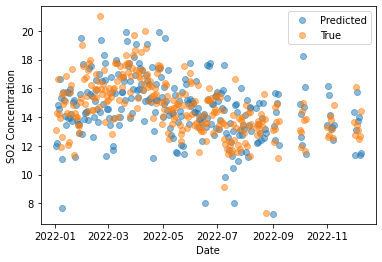

In [375]:
SO2_testing_preds, SO2_testing_mae = walk_forward_validation(np.array(SO2_train_data), np.array(SO2_test_data))

plt.plot_date(SO2_test_data.index, SO2_testing_preds, label="Predicted", alpha=0.5)
plt.plot_date(SO2_test_data.index, SO2_test_data["var1(t)"], label="True", alpha=0.5)
plt.ylabel("SO2 Concentration")
plt.xlabel("Date")
plt.legend()
plt.show()

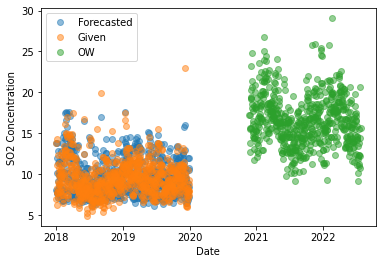

In [397]:
SO2_all_train_data = np.array(pd.concat([SO2_train_data, SO2_test_data]))
SO2_train_X, SO2_train_y = SO2_all_train_data[:,:-1], SO2_all_train_data[:,-1]

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(SO2_train_X, SO2_train_y)

SO2_early_preds = model.predict(np.array(SO2_df_pre))

all_dates = np.concatenate((SO2_df_pre.index, ow_data_date["Date"]))
all_SO2 = np.concatenate((SO2_early_preds, ow_data_date["SO2"]))

plt.plot_date(SO2_df_pre.index, SO2_early_preds, label="Forecasted", alpha=0.5)
plt.plot_date(SO2_df_pre.index, SO2_df_pre["SO2"], label="Given", alpha=0.5)
plt.plot_date(ow_data_date["Date"], ow_data_date["SO2"], label="OW", alpha=0.5)
plt.ylabel("SO2 Concentration")
plt.xlabel("Date")
plt.legend()
plt.show()

MAE = 3.3988921476255602


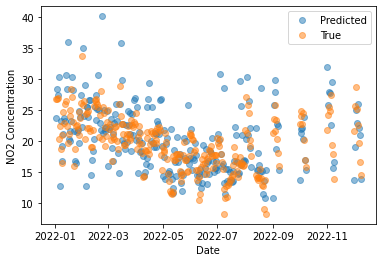

In [372]:
NO2_testing_preds, NO2_testing_mae = walk_forward_validation(np.array(NO2_train_data), np.array(NO2_test_data))

plt.plot_date(NO2_test_data.index, NO2_testing_preds, label="Predicted", alpha=0.5)
plt.plot_date(NO2_test_data.index, NO2_test_data["var1(t)"], label="True", alpha=0.5)
plt.ylabel("NO2 Concentration")
plt.xlabel("Date")
plt.legend()
plt.show()

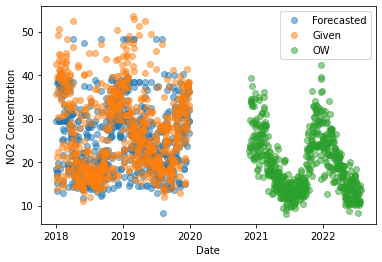

In [398]:
NO2_all_train_data = np.array(pd.concat([NO2_train_data, NO2_test_data]))
NO2_train_X, NO2_train_y = NO2_all_train_data[:,:-1], NO2_all_train_data[:,-1]

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(NO2_train_X, NO2_train_y)

NO2_early_preds = model.predict(np.array(NO2_df_pre))

all_dates = np.concatenate((NO2_df_pre.index, ow_data_date["Date"]))
all_NO2 = np.concatenate((NO2_early_preds, ow_data_date["NO2"]))

plt.plot_date(NO2_df_pre.index, NO2_early_preds, label="Forecasted", alpha=0.5)
plt.plot_date(NO2_df_pre.index, NO2_df_pre["NO2"], label="Given", alpha=0.5)
plt.plot_date(ow_data_date["Date"], ow_data_date["NO2"], label="OW", alpha=0.5)
plt.ylabel("NO2 Concentration")
plt.xlabel("Date")
plt.legend()
plt.show()

MAE = 144.77192116748418


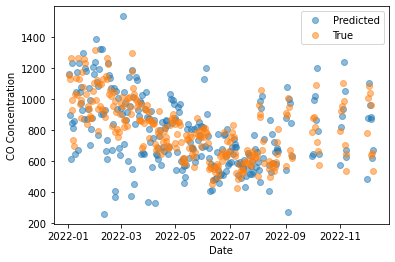

In [373]:
CO_testing_preds, CO_testing_mae = walk_forward_validation(np.array(CO_train_data), np.array(CO_test_data))

plt.plot_date(CO_test_data.index, CO_testing_preds, label="Predicted", alpha=0.5)
plt.plot_date(CO_test_data.index, CO_test_data["var1(t)"], label="True", alpha=0.5)
plt.ylabel("CO Concentration")
plt.xlabel("Date")
plt.legend()
plt.show()

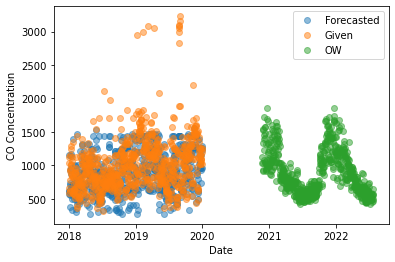

In [399]:
CO_all_train_data = np.array(pd.concat([CO_train_data, CO_test_data]))
CO_train_X, CO_train_y = CO_all_train_data[:,:-1], CO_all_train_data[:,-1]

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(CO_train_X, CO_train_y)

CO_early_preds = model.predict(np.array(CO_df_pre))

all_dates = np.concatenate((CO_df_pre.index, ow_data_date["Date"]))
all_CO = np.concatenate((CO_early_preds, ow_data_date["CO"]))

plt.plot_date(CO_df_pre.index, CO_early_preds, label="Forecasted", alpha=0.5)
plt.plot_date(CO_df_pre.index, CO_df_pre["CO"], label="Given", alpha=0.5)
plt.plot_date(ow_data_date["Date"], ow_data_date["CO"], label="OW", alpha=0.5)
plt.ylabel("CO Concentration")
plt.xlabel("Date")
plt.legend()
plt.show()

MAE = 10.193980662073514


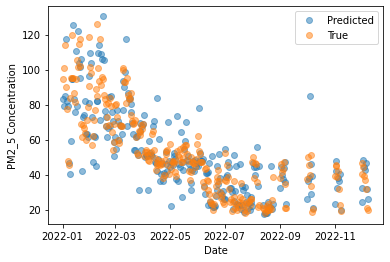

In [374]:
PM2_5_testing_preds, PM2_5_testing_mae = walk_forward_validation(np.array(PM2_5_train_data), np.array(PM2_5_test_data))

plt.plot_date(PM2_5_test_data.index, PM2_5_testing_preds, label="Predicted", alpha=0.5)
plt.plot_date(PM2_5_test_data.index, PM2_5_test_data["var1(t)"], label="True", alpha=0.5)
plt.ylabel("PM2_5 Concentration")
plt.xlabel("Date")
plt.legend()
plt.show()

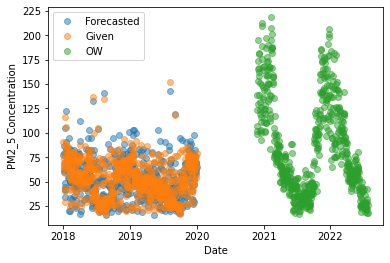

In [400]:
PM2_5_all_train_data = np.array(pd.concat([PM2_5_train_data, PM2_5_test_data]))
PM2_5_train_X, PM2_5_train_y = PM2_5_all_train_data[:,:-1], PM2_5_all_train_data[:,-1]

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(PM2_5_train_X, PM2_5_train_y)

PM2_5_early_preds = model.predict(np.array(PM2_5_df_pre))

all_dates = np.concatenate((PM2_5_df_pre.index, ow_data_date["Date"]))
all_PM2_5 = np.concatenate((PM2_5_early_preds, ow_data_date["PM2_5"]))

plt.plot_date(PM2_5_df_pre.index, PM2_5_early_preds, label="Forecasted", alpha=0.5)
plt.plot_date(PM2_5_df_pre.index, PM2_5_df_pre["PM2_5"], label="Given", alpha=0.5)
plt.plot_date(ow_data_date["Date"], ow_data_date["PM2_5"], label="OW", alpha=0.5)
plt.ylabel("PM2_5 Concentration")
plt.xlabel("Date")
plt.legend()
plt.show()